<a href="https://colab.research.google.com/github/Ramilopez99/Zalando/blob/main/5_Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importación de librerías necesarias

In [ ]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils

## 2. Preproceso de datos

### a) Importación de los datos del dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

### b) Mostrar los datos del dataframe importado

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
#mostramos cuantos tipos de etiquetas existen
display(np.unique(y_train))
display(np.unique(y_test))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

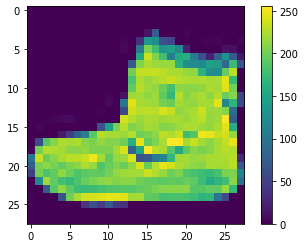

In [ ]:
#mostramos la primera imagen
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#normalizamos la imagenes para que cada pixel en vez de ir
#de 0 a 255, vaya de 0 a 1
X_train = X_train / 255.0
X_test = X_test / 255.0

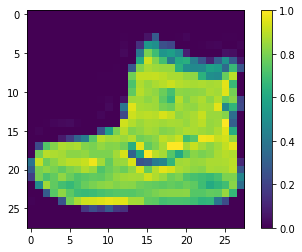

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

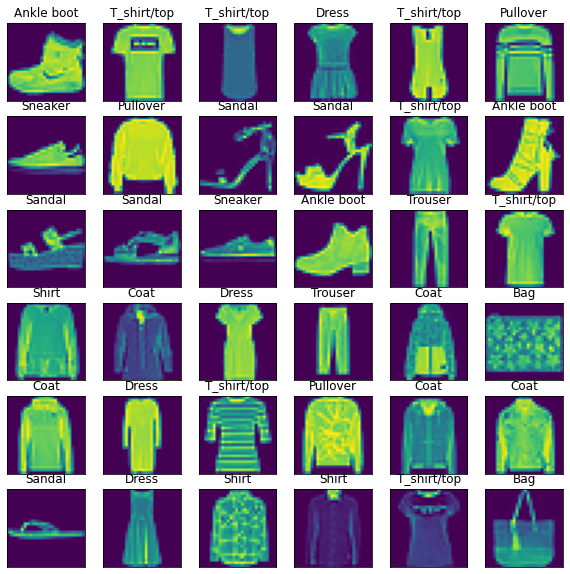

In [ ]:
#definimos el nombre de las etiquetas
class_names = ['T_shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat', 
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

#mostramos los 36 primeros elementos, con su etiqueta asociada
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

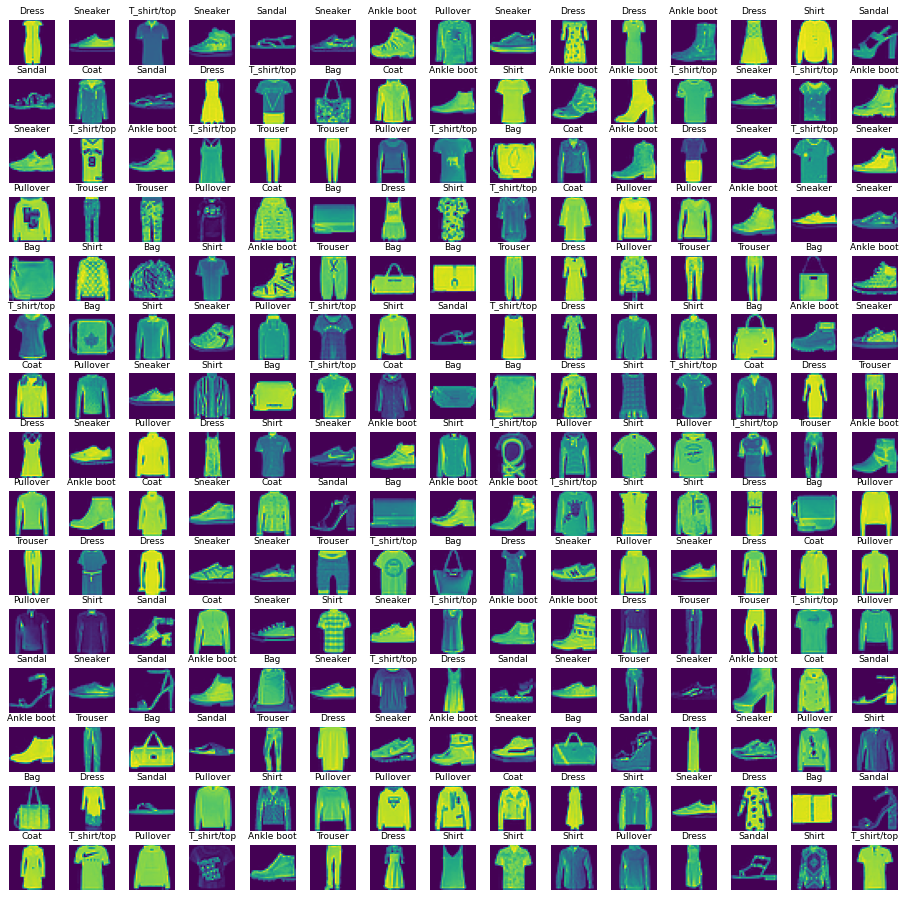

In [ ]:
#mostramos 255 elementos del dataset aleatoriamente

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index].reshape((28,28)) )
    labelindex = int(y_train[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [ ]:
#Codificamos las etiquetas de clase
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 3.  Entrenamiento, predicción y evaluación del modelo 

###Construcción de la red neuronal

In [ ]:
# Crear un modelo de red neuronal
model = Sequential()

# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=X_train.shape[1:]))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Agregar una capa de salida con la función de activación softmax
model.add(Dense(10, activation='softmax'))

###Compilación del modelo

In [ ]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Entrenamiento del modelo

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 13s 25ms/step - loss: 0.9088 - accuracy: 0.6736 - val_loss: 0.5184 - val_accuracy: 0.8019
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5912 - accuracy: 0.7918 - val_loss: 0.4532 - val_accuracy: 0.8380
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.5316 - accuracy: 0.8167 - val_loss: 0.4301 - val_accuracy: 0.8433
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5036 - accuracy: 0.8258 - val_loss: 0.4136 - val_accuracy: 0.8514
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.4820 - accuracy: 0.8312 - val_loss: 0.4180 - val_accuracy: 0.8487
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.4663 - accuracy: 0.8376 - val_loss: 0.3965 - val_accuracy: 0.8570
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 0.4564 - accuracy: 0.8407 - val_loss: 0.3866 - val_accuracy: 0.85

In [ ]:
# Evaluar el rendimiento del modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida del modelo en los datos de prueba (loss): {loss:.4f}")
print(f"Precisión del modelo en los datos de prueba (accuracy): {accuracy:.4f}")

313/313 [==============================] - 2s 6ms/step - loss: 0.3611 - accuracy: 0.8697
Pérdida del modelo en los datos de prueba (loss): 0.3611
Precisión del modelo en los datos de prueba (accuracy): 0.8697


### Visualización de resultados

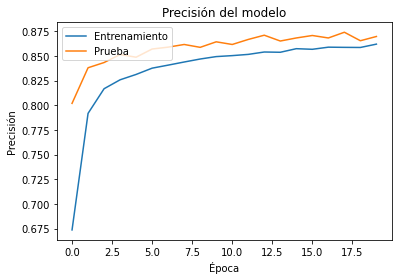

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

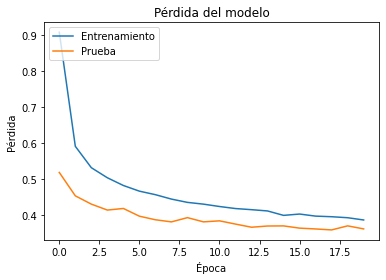

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()